In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

In [4]:
train = pd.read_csv('../data/train_clean.csv')

In [5]:
train.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
119,119,2.01,0,3,2,70.6,64.0,18574
31113,31113,0.65,0,1,3,65.1,55.6,1659
34580,34580,1.02,3,2,1,62.5,54.0,4284
19584,19584,0.26,4,3,5,62.7,53.0,514
19944,19944,1.51,3,6,4,63.0,52.0,17936


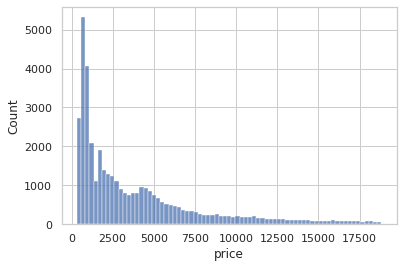

In [6]:
sns.histplot(train.price);

In [7]:
X = train.drop(columns='price')

In [8]:
y = train.price

In [9]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [10]:
models={
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [11]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [12]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------ridge------
MAE -  858.9305412444776
MSE -  1534923.395267637
RMSE -  1238.9202537966828
R2 -  0.9042582684225429
------lasso------
MAE -  858.5350361572898
MSE -  1534944.3485114363
RMSE -  1238.9287100198446
R2 -  0.9042569614518825
------sgd------
MAE -  3400920991837771.0
MSE -  1.5352552118549891e+31
RMSE -  3918233290470322.5
R2 -  -9.576242882836697e+23
------knn------
MAE -  3185.6421703126935
MSE -  18211956.049447536
RMSE -  4267.546842091781
R2 -  -0.13598125676012796
------grad------
MAE -  346.96957479927323
MSE -  403672.7756668162
RMSE -  635.3524814359477
R2 -  0.9748206779229653


In [13]:
results = []
for depth in range(1,21):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    results.append(result)

In [14]:
tree = pd.DataFrame(results)

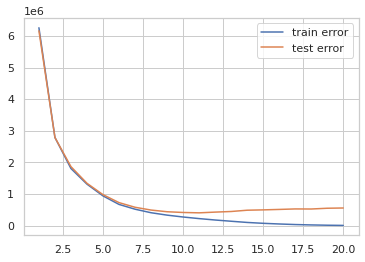

In [15]:
plt.plot(tree.depth, tree.train_error, label="train error")
plt.plot(tree.depth, tree.test_error, label="test error")
plt.legend();

Sigue siendo un error muy grande. Rechazamos este modelo.

Vamos a probar un RandomForestRegressor con varios parámetros y aplicarle un GridSearchCV para que me encuentre los mejores parámetros y probaremos con el modelo resultante.

In [16]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400]}

In [17]:
rfr = RandomForestRegressor()

In [18]:
grid = GridSearchCV(rfr, parameters, verbose=1)

In [19]:
# grid.fit(X_train,y_train)

In [20]:
# print(grid.best_params_)


Too slow. We are going to perform a PCA analysis to reduce the number of predictors.

## PCA Analysis 

First of all, we need to standardize the data, because PCA is effected by scale so you need to scale the features in the data before applying PCA.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [22]:
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [23]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [24]:
X_train[0]

array([-0.64748689, -0.06841029,  0.56258678,  0.28958708, -0.35406868,
        0.85820266,  0.37924275])

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
grad.fit(X_train, y_train)

In [ ]:
y_pred = grad.predict(X_test)
print(f"------"GRAD"------")
print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - ', metrics.r2_score(y_test, y_pred))